In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Carrega o dataset Boston Housing do OpenML
boston = fetch_openml(name="Boston", version=1, as_frame=True)
X = boston.data.astype(float)  # força tipo numérico
y = boston.target.astype(float)

In [ ]:
# Separa treino e teste
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42)

# Adiciona coluna de bias (1s)
X_train_bias = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test_bias = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

# Calcula a pseudoinversa e pesos (w = X⁺y)
X_pseudo_inv = np.linalg.pinv(X_train_bias)
w = X_pseudo_inv @ y_train

# Faz previsões
y_pred = X_test_bias @ w

# Calcula erro (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE no conjunto de teste: {rmse:.4f}\n")

RMSE no conjunto de teste: 4.6387

Primeiras previsões:
   Valor Real (medv)  Valor Previsto
0               23.6       28.648960
1               32.4       36.495014
2               13.6       15.411193
3               22.8       25.403213
4               16.1       18.855280
5               20.0       23.146689
6               17.8       17.392124
7               14.0       14.078599
8               19.6       23.036927
9               16.8       20.599433


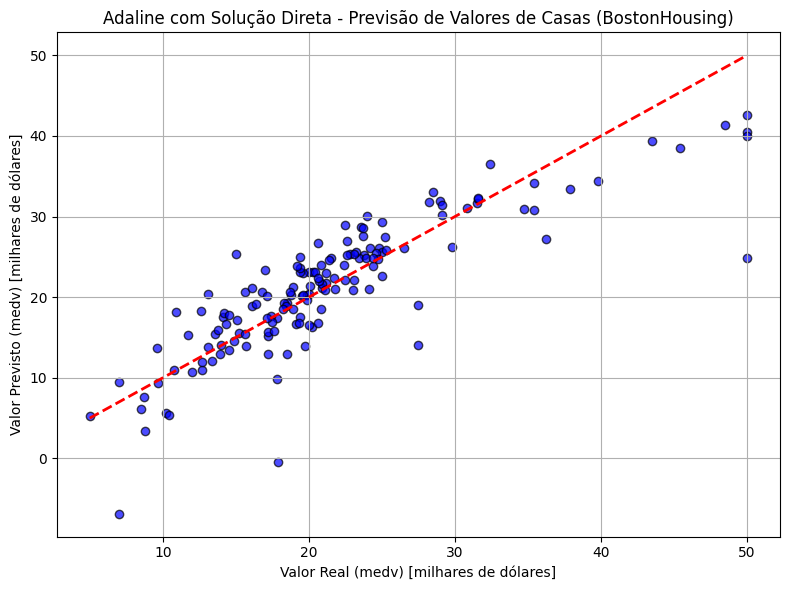

In [3]:
# Mostra os 10 primeiros valores reais e previstos
df_resultado = pd.DataFrame({
    'Valor Real (medv)': y_test[:10],
    'Valor Previsto': y_pred[:10]
})
print("Primeiras previsões:")
print(df_resultado)

# Gráfico: valores reais vs. previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)
plt.xlabel('Valor Real (medv) [milhares de dólares]')
plt.ylabel('Valor Previsto (medv) [milhares de dólares]')
plt.title('Adaline com Solução Direta - Previsão de Valores de Casas (BostonHousing)')
plt.grid(True)
plt.tight_layout()
plt.show()